In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from config import parse_proteins_in_file

import os 
os.getcwd()

'/home/selezov_su/notebooks/Promics/Panoram'

In [3]:
import gseapy as gp

names = gp.get_library_name(organism='Human')
names;

In [57]:
result = result.iloc[:16]
result["To"] = proteins

In [50]:
# with open("Data/only_pneumonia.txt", "r") as file:
#     proteins = file.read().splitlines()

proteins = ["A2ML1", "SCEL", "CSTB", "KLK1", "IVL", "JUP", "Desmoplakin", "CD9", "TGM3", "TRIM29", "ECM1", "NCCRP1", "EVPL", "MUC5B", "S100A14", "CRNN"]

from UniProtMapper import ProtMapper

mapper = ProtMapper()

result, failed = mapper.get(
    ids=proteins, from_db="UniProtKB_AC-ID", to_db="Gene_Name"
)

with open("Data/only_pneumonia_gene_set.txt", 'w') as file:
    file.write("\n".join(result["To"].to_list()))

Setting fields to `None` to retrieve all available fields...


Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s


KeyboardInterrupt: 

In [1]:
with open("Data/de_proteins.txt", "r") as file:
    proteins = file.read().splitlines() 


from UniProtMapper import ProtMapper

mapper = ProtMapper()

result, failed = mapper.get(
    ids=proteins, from_db="UniProtKB_AC-ID", to_db="Gene_Name"
)

with open("Data/de_gene_set.txt", 'w') as file:
    file.write("\n".join(result["To"].to_list()))

Setting fields to `None` to retrieve all available fields...


Retrying in 3s
Fetched: 28 / 28


In [36]:
with open("Data/whole_protein_set.txt", "r") as file:
    proteins = file.read().splitlines() 


from UniProtMapper import ProtMapper

mapper = ProtMapper()

result, failed = mapper.get(
    ids=proteins, from_db="UniProtKB_AC-ID", to_db="Gene_Name"
)

with open("Data/whole_gene_set.txt", 'w') as file:
    file.write("\n".join(result["To"].to_list()))

Setting fields to `None` to retrieve all available fields...


Fetched: 98 / 98


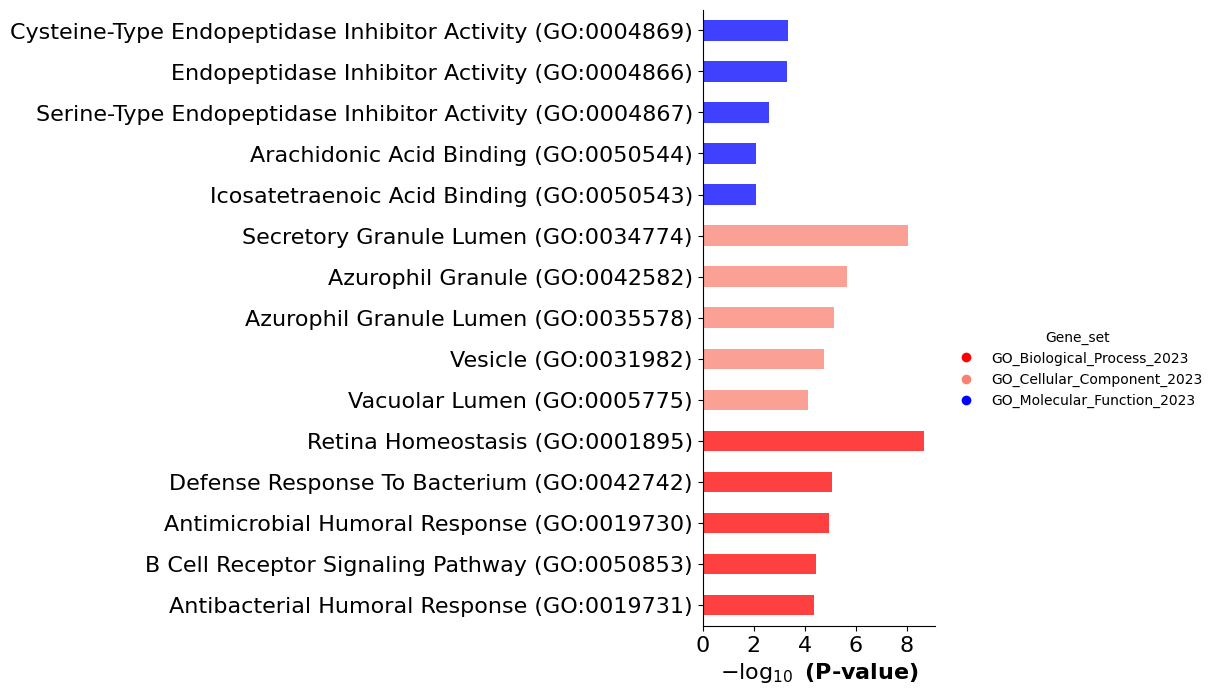

In [2]:
import gseapy as gp
go_mf = gp.get_library(name='GO_Cellular_Component_2021', organism='Human')


# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=result["To"].to_list(), # or "./tests/data/gene_list.txt",
    gene_sets=['GO_Biological_Process_2023', 'GO_Molecular_Function_2023', "GO_Cellular_Component_2023"],
    organism='human', # don't forget to set organism to the one you desired!␣˓→e.g. Yeast
    # background=None,
    outdir=None, # don't write to disk
    cutoff=0.05
)

enr.results


# categorical scatterplot
ax = gp.barplot(
    enr.results,
    # title = "Gene ontology",
    column="P-value",
    group='Gene_set', # set group, so you could do a multi-sample/library comparsion
    size=5,
    top_term=5,
    figsize=(3,8),
    #color=['darkred', 'darkblue'] # set colors for group
    color = {
        'GO_Biological_Process_2021': 'red', 
        'GO_Molecular_Function_2021':'salmon',
        "GO_Cellular_Component_2021" : "blue",
        # "KEGG_2021_Human" : "red",
    }
)
ax.figure.savefig("Plots/go_barplot.png", bbox_inches="tight", dpi=200)

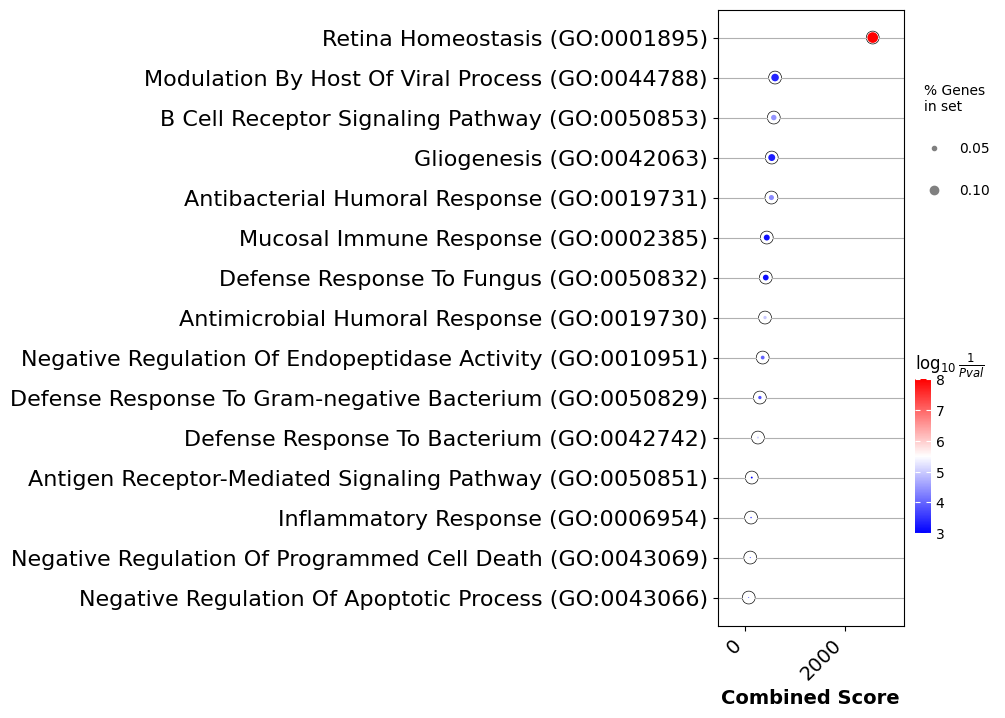

In [3]:
import gseapy as gp
go_mf = gp.get_library(name='GO_Cellular_Component_2023', organism='Human')

# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=result["To"].to_list(), # or "./tests/data/gene_list.txt",
    gene_sets=['GO_Biological_Process_2023'],
    organism='human', # don't forget to set organism to the one you desired!␣˓→e.g. Yeast
    # background=None,
    outdir=None, # don't write to disk
    cutoff=0.1
)

enr.results


# simple plotting function
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(
    enr.results,
    column="P-value",
    x="Gene set", # set x axis, so you could do a multi-sample/library comparsion
    size=10,
    top_term=15,
    figsize=(3,8),
    # title = "Gene ontology",
    xticklabels_rot=45, # rotate xtick labels
    show_ring=True, # set to False to revmove outer ring
    marker='o',
    cmap="bwr",
)
ax.figure.savefig("Plots/go_dotplot.png", bbox_inches="tight", dpi=200)

In [9]:
pneuma = ["A2ML1", "SCEL", "CSTB", "KLK1", "IVL", "JUP", "Desmoplakin", "CD9", "TGM3", "TRIM29", "ECM1", "NCCRP1", "EVPL", "MUC5B", "S100A14", "CRNN"]#parse_proteins_in_file("Data/only_pneumonia.txt")


with open("Data/whole_gene_set.txt", "r") as file:
    proteins = file.read().splitlines() 




tissues = pd.read_csv("normal_tissue.tsv", sep="\t").iloc[:-1]
# t = tissues.loc[tissues["Tissue"] == "nasopharynx"][["Cell type", "Gene name"]]
t = tissues[["Tissue", "Gene name"]].dropna()

# gene_sets = dict((typ, t.loc[t["Cell type"] == typ]["Gene name"].to_list()) for typ in t["Cell type"].drop_duplicates())
gene_sets = dict((typ, t.loc[t["Tissue"] == typ]["Gene name"].to_list()) for typ in t["Tissue"].drop_duplicates())

enr2 = gp.enrich(
    gene_list=proteins, # or gene_list=glist
    gene_sets=gene_sets, # kegg is a dict object
    background=None, # or "hsapiens_gene_ensembl", or int, or text file, or a list of genes
    outdir=None,
    verbose=True
)

2024-10-01 10:05:56,754 [INFO] Input dict object named with gs_ind_0
2024-10-01 10:05:56,756 [INFO] Run: gs_ind_0 
2024-10-01 10:05:56,802 [INFO] Background is not set! Use all 9685 genes in gs_ind_0.
2024-10-01 10:05:56,854 [INFO] Done.


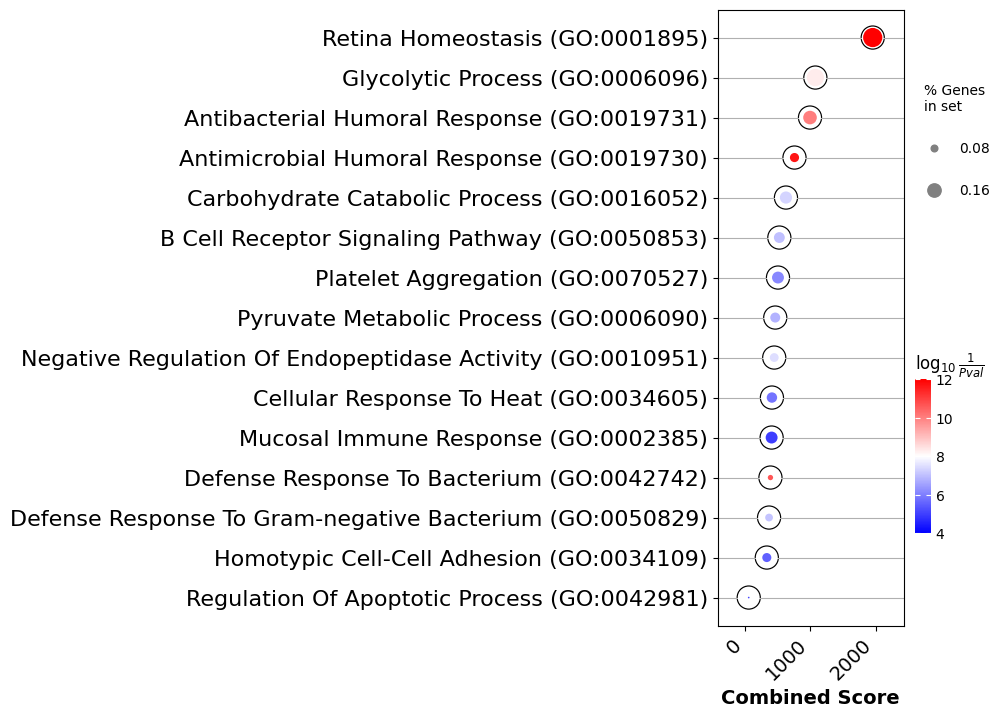

In [10]:


import gseapy as gp
go_mf = gp.get_library(name='GO_Cellular_Component_2023', organism='Human')

# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=proteins, # or "./tests/data/gene_list.txt",
    gene_sets=['GO_Biological_Process_2023'],
    organism='human', # don't forget to set organism to the one you desired!␣˓→e.g. Yeast
    # background=None,
    outdir=None, # don't write to disk
    cutoff=0.1
)

enr.results


# simple plotting function
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(
    enr.results,
    column="P-value",
    x="Gene set", # set x axis, so you could do a multi-sample/library comparsion
    size=10,
    top_term=15,
    figsize=(3,8),
    # title = "Gene ontology",
    xticklabels_rot=45, # rotate xtick labels
    show_ring=True, # set to False to revmove outer ring
    marker='o',
    cmap="bwr",
)
ax.figure.savefig("Plots/go_dotplot.png", bbox_inches="tight", dpi=200)

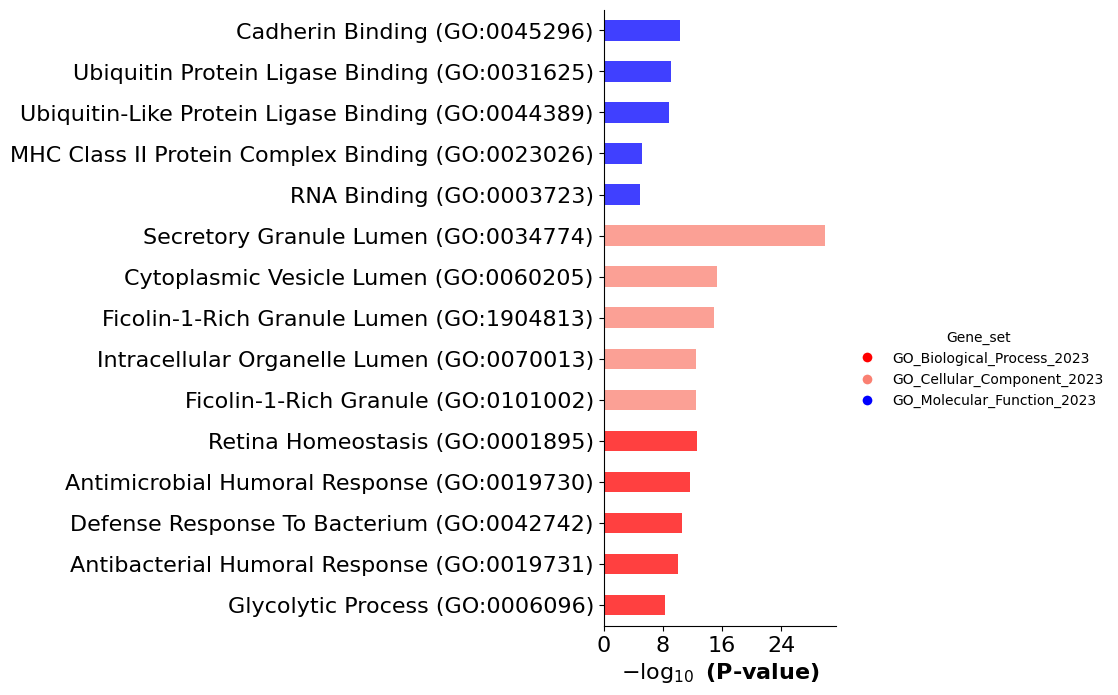

In [12]:
import gseapy as gp
go_mf = gp.get_library(name='GO_Cellular_Component_2021', organism='Human')


# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=proteins, # or "./tests/data/gene_list.txt",
    gene_sets=['GO_Biological_Process_2023', 'GO_Molecular_Function_2023', "GO_Cellular_Component_2023"],
    organism='human', # don't forget to set organism to the one you desired!␣˓→e.g. Yeast
    # background=None,
    outdir=None, # don't write to disk
    cutoff=0.05
)

enr.results


# categorical scatterplot
ax = gp.barplot(
    enr.results,
    # title = "Gene ontology",
    column="P-value",
    group='Gene_set', # set group, so you could do a multi-sample/library comparsion
    size=5,
    top_term=5,
    figsize=(3,8),
    #color=['darkred', 'darkblue'] # set colors for group
    color = {
        'GO_Biological_Process_2021': 'red', 
        'GO_Molecular_Function_2021':'salmon',
        "GO_Cellular_Component_2021" : "blue",
        # "KEGG_2021_Human" : "red",
    }
)
ax.figure.savefig("Plots/go_barplot.png", bbox_inches="tight", dpi=200)

In [ ]:
import gseapy as gp
go_mf = gp.get_library(name='GO_Cellular_Component_2023', organism='Human')

# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(
    gene_list=result["To"].to_list(), # or "./tests/data/gene_list.txt",
    gene_sets=['GO_Biological_Process_2023'],
    organism='human', # don't forget to set organism to the one you desired!␣˓→e.g. Yeast
    # background=None,
    outdir=None, # don't write to disk
)

enr.results


# simple plotting function
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(
    enr.results,
    column="P-value",
    x="Gene set", # set x axis, so you could do a multi-sample/library comparsion
    size=10,
    top_term=15,
    figsize=(3,8),
    title = "Gene ontology",
    xticklabels_rot=45, # rotate xtick labels
    show_ring=True, # set to False to revmove outer ring
    marker='o',
    cmap="bwr",
)
ax.figure.savefig("Plots/go_dotplot.png", bbox_inches="tight", dpi=200)

In [18]:
from gseapy import heatmap


# plotting heatmap
i = 2
genes = gs_res.res2d.Lead_genes[i].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
ax = heatmap(df = gs_res.heatmat.loc[genes], z_score=0, title=terms[i], figsize=(14,4))


NameError: name 'gs_res' is not defined